<a href="https://colab.research.google.com/github/amandacmelo/Projeto-Ciencia-de-Dados/blob/main/An%C3%A1lise_explorat%C3%B3ria_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/BrStats.csv"
dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio
dados.columns

<ipython-input-8-79277775344f>:7: DtypeWarning: Columns (2,3,4,5,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio


Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao'],
      dtype='object')

Análise da quantidade de cidades de cada regiao que tiveram a quantidade de nascimentos por ano maior que a media nacional

RESULTADO:** Nordeste** apresentou maior numero de cidades com numero de nascimentos maior que a media nacional

Análise da quantidade de cidades de cada regiao que tiveram a quantidade de obitos por ano maior que a media nacional

RESULTADO:** Nordeste** apresentou maior numero de cidades com numero de obitos infantis maior que a media nacional

<Axes: xlabel='Regiao', ylabel='count'>

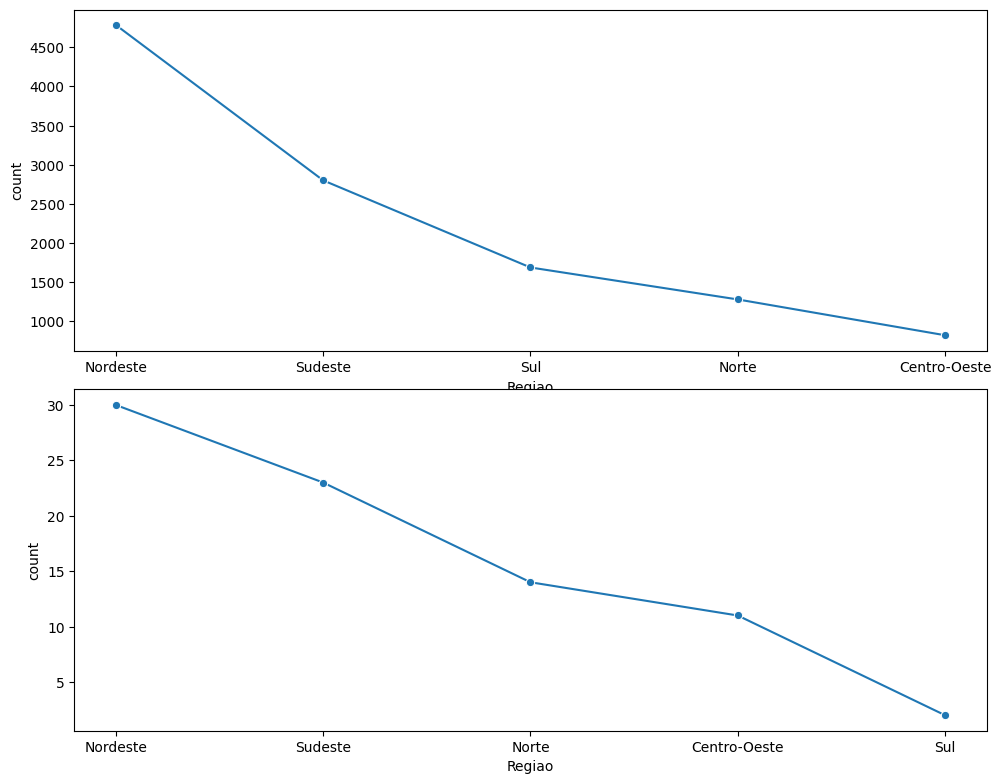

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 linhas, 1 coluna

media_nascimentos = dados["NrNascimentos"].mean()
resul = dados[dados["NrNascimentos"] > media_nascimentos] [["NrNascimentos", "Municipio", "Regiao"]]
resul = resul["Regiao"].value_counts()

media_obitos = dados["NrObitosInfantis"].mean()
resul2 = dados[dados["NrObitosInfantis"] > media_nascimentos] [["NrObitosInfantis", "Municipio", "Regiao"]]
resul2= resul2["Regiao"].value_counts()


sns.lineplot(data= resul2, marker="o", ax=axs[1])
plt.tight_layout()  # Ajusta layout para não sobrepor
sns.lineplot(data= resul, marker="o", ax=axs[0])

# **Impacto agricultura cidades**

Neste tópico foi-se realizada a análise do **impacto da produção agrícola na vida da população local**. Para isso, foram retiradas amostras de cidades (os criterios para decisao de tais amostras serão explicados posteriormente) que possuem grande participaçao na agricultura da regiao Centro-Oeste, já que a regiao possui grande contribuição na produção agrícola do Brasil.

Nesta primeira célula de código agrupei os dados por Região e Ano e posteriomente calculei a media da produção agrícola de tal agrupamento. Para melhor visualização, tambem plotei o grafico de tais medias, por ano e região.  

A partir de tais gráficos foi possivel observar um aumento na produção agricola a partir do ano de 2019.

**OPINEM SOBRE OS GRAFICOS, nao sei qual é a melhor opção de visualização, talvez nenhum dos dois estejam bons**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

dados_agricolas = dados.groupby(["Regiao", "Ano"])
media_dados_agricolas = dados_agricolas[["VlProducaoAgricola"]].mean(numeric_only=True)

sns.catplot(data=media_dados_agricolas, kind="bar", x="Ano", y="VlProducaoAgricola", hue="Regiao")

sns.relplot(data=media_dados_agricolas, kind="line", x="Ano", y="VlProducaoAgricola", hue="Regiao")

KeyError: 'Regiao'

As 5 próximas células de código estão relacionadas com a seleção das cidades para amostra na análise de impacto. Em tais células, é calculada a media da regiao Centro-Oeste no ano especificado e com base nessa métrica, são filtradas as cidades que tiveram o valor de produção agrícola maior que a da média calculada para aquele ano (tal análise foi realizada para os anos de 2017 ate 2021)

In [29]:
dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste[dados_Centro_Oeste["Ano"] == 2017]
media_2017_centro_oeste = media_dados_agricolas.loc['Centro-Oeste', 2017].values[0]

resultado2017 = dados_Centro_Oeste[dados_Centro_Oeste["VlProducaoAgricola"] > media_2017_centro_oeste][["Municipio", "Regiao", "VlProducaoAgricola", "Ano"]]

resultado2017
resultado2017.shape
contagem2017 = resultado2017.value_counts()

In [ ]:
dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste[dados_Centro_Oeste["Ano"] == 2018]
media_2018_centro_oeste = media_dados_agricolas.loc['Centro-Oeste', 2018].values[0]

resultado2018 = dados_Centro_Oeste[dados_Centro_Oeste["VlProducaoAgricola"] > media_2018_centro_oeste][["Municipio", "Regiao", "VlProducaoAgricola", "Ano"]]

resultado2018
resultado2018.shape
contagem2018 = resultado2018.value_counts()

In [ ]:
dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste[dados_Centro_Oeste["Ano"] == 2019]
media_2019_centro_oeste = media_dados_agricolas.loc['Centro-Oeste', 2019].values[0]

resultado2019 = dados_Centro_Oeste[dados_Centro_Oeste["VlProducaoAgricola"] > media_2019_centro_oeste][["Municipio", "Regiao", "VlProducaoAgricola", "Ano"]]

resultado2019
resultado2019.shape
contagem2019 = resultado2019.value_counts()
#dados_Centro_Oeste.shape
#Quais as cidades  da regiao Centro-Oeste que no ano de 2019 que tiveram o valor de produçao agricola maior que a da media da regiao no ano

In [ ]:
dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste[dados_Centro_Oeste["Ano"] == 2020]
media_2020_centro_oeste = media_dados_agricolas.loc['Centro-Oeste', 2020].values[0]

resultado2020 = dados_Centro_Oeste[dados_Centro_Oeste["VlProducaoAgricola"] > media_2020_centro_oeste][["Municipio", "Regiao", "VlProducaoAgricola", "Ano"]]

resultado2020
resultado2020.shape
contagem2020 = resultado2020.value_counts()
#dados_Centro_Oeste.shape
#Quais as cidades  da regiao Centro-Oeste que no ano de 2020 que tiveram o valor de produçao agricola maior que a da media da regiao no ano

In [ ]:
dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste[dados_Centro_Oeste["Ano"] == 2021]
media_2021_centro_oeste = media_dados_agricolas.loc['Centro-Oeste', 2021].values[0]

resultado2021 = dados_Centro_Oeste[dados_Centro_Oeste["VlProducaoAgricola"] > media_2021_centro_oeste][["Municipio", "Regiao", "VlProducaoAgricola", "Ano"]]

resultado2021
resultado2021.shape
contagem2021 = resultado2021.value_counts()
#dados_Centro_Oeste.shape
#Quais as cidades  da regiao Centro-Oeste que no ano de 2021 que tiveram o valor de produçao agricola maior que a da media da regiao no ano

Dando continuação ao trabalho realizado nas celulas anteriores, esse trecho de codigo concatena o resultado (a seleçao das cidades que tiveram produção agricola maior que a media) de cada um dos anos. Após tal junçao, contei quantas vezes cada cidade aparece e selecionei as que aparecem 5 vezes (tiveram produção maior que a media nos 5 anos consecutivos). Desta maneira, obtive as cidades que possuem grande significancia na produção agricola na regiao Centro-Oeste do Brasil.

In [33]:
todos_municipios = pd.concat([
    resultado2019["Municipio"],
    resultado2020["Municipio"],
    resultado2021["Municipio"],
    resultado2018["Municipio"],
    resultado2017["Municipio"]
])

frequencia_cidades = todos_municipios.value_counts()

frequencia_cidades = frequencia_cidades[frequencia_cidades == 5]

# Mostra as cidades mais frequentes
#print(frequencia_cidades.head(100))

,count
Municipio,
Ivinhema,5
Uruaçu,5
Bandeirantes,5
Itaporã,5
Juara,5
Barra do Bugres,5
Antônio João,5
Vila Rica,5
Rosário Oeste,5


In [2]:

dados_ivinhema = dados[(dados['Municipio'] == 'Ivinhema') & (dados['Ano'] >= 2016) & (dados['Ano'] <= 2021)]


soma_producao_ivinhema = dados_ivinhema.groupby('Ano', as_index=False)['VlProducaoAgricola'].sum()
soma_Assalariados_ivinhema = dados_ivinhema.groupby('Ano', as_index=False)['PessoalAssalariado'].sum()
soma_obitos_ivinhema = dados_ivinhema.groupby('Ano', as_index=False)[',Proporcao_PessoalAssalariado'].sum()

fig, axs = plt.subplots(3, 1, figsize=(5, 10), sharex=True)

# Produção Agrícola
axs[0].plot(soma_producao_ivinhema["Ano"], soma_producao_ivinhema["VlProducaoAgricola"], marker='o')
axs[0].set_ylabel('Produção Agrícola')
axs[0].set_ylim(bottom=0)
axs[0].grid(True)

soma_Assalariados_ivinhema["PessoalAssalariado"] = soma_Assalariados_ivinhema["PessoalAssalariado"].str.replace('.', '').str.replace(',', '.').astype(float)

# Pessoal Assalariado
axs[1].plot(soma_Assalariados_ivinhema["Ano"], soma_Assalariados_ivinhema["PessoalAssalariado"], marker='s', color='green')
axs[1].set_ylabel('Pessoal Assalariado')
axs[1].set_ylim(0, 4500)
axs[1].set_ylim(bottom=0)
axs[1].grid(True)

soma_obitos_ivinhema["Exportacoes_US$"] = soma_obitos_ivinhema["Exportacoes_US$"].str.replace('.', '').str.replace(',', '.').astype(float)

# Óbito Infantil
axs[2].plot(soma_obitos_ivinhema["Ano"], soma_obitos_ivinhema[",Proporcao_PessoalAssalariado"], marker='^', color='red')
axs[2].set_ylabel('Óbitos Infantis')
axs[2].set_xlabel('Ano')
axs[2].set_ylim(bottom=0)
axs[2].grid(True)


KeyError: 'Municipio'

In [ ]:
# Filtrar os dados para a cidade de Ivinhema e para os anos de 2016 a 2021
dados_ivinhema = dados[(dados['Municipio'] == 'Ivinhema') & (dados['Ano'] >= 2016) & (dados['Ano'] <= 2021)]
dados_Peixoto = dados[(dados['Municipio'] == 'Peixoto de Azevedo') & (dados['Ano'] >= 2016) & (dados['Ano'] <= 2021)]
dados_Nortelandia = dados[(dados['Municipio'] == 'Nortelandia') & (dados['Ano'] >= 2016) & (dados['Ano'] <= 2021)]

soma_producao_ivinhema = dados_ivinhema.groupby('Ano')['VlProducaoAgricola'].sum()
soma_producao_Peixoto = dados_Peixoto.groupby('Ano')['VlProducaoAgricola'].sum()
soma_producao_Nortelandia = dados_Nortelandia.groupby('Ano')['VlProducaoAgricola'].sum()

sns.relplot(data=media_dados_agricolas, kind="line", x="Ano", y="VlProducaoAgricola", hue="Regiao")

In [ ]:
dados.columns = dados.columns.str.strip()


colunas = ['Ano', 'Regiao', 'Municipio', 'Populacao',
           'Transferencias_correntes_R$', 'Transferencias_capital_R$']


colunas_existentes = [col for col in colunas if col in dados.columns]

df_filtrado = dados[colunas_existentes]


df_agrupado = df_filtrado.sort_values(by=['Ano', 'Regiao', 'Municipio'])

from IPython.display import display
display(df_agrupado)

,Ano,Regiao,Municipio,Populacao,Transferencias_correntes_R$,Transferencias_capital_R$
544,2016,Centro-Oeste,Abadia de Goiás,8.053,"24.393.331,910","843.970,170"
25591,2016,Centro-Oeste,Abadiânia,18.427,"33.401.066,860","480.375,940"
1295,2016,Centro-Oeste,Acorizal,5.301,"12.824.943,670","0,000"
23500,2016,Centro-Oeste,Acreúna,21.905,"45.753.551,300","2.329.023,970"
24885,2016,Centro-Oeste,Adelândia,2.561,"12.109.747,380","403.500,000"
...,...,...,...,...,...,...
11428,2021,Sul,Águas Frias,2.341,"23.401.697,090","1.444.391,510"
11454,2021,Sul,Águas Mornas,6.646,"24.786.075,560","2.012.239,140"
13138,2021,Sul,Águas de Chapecó,6.544,"25.106.759,800","2.080.750,000"
11643,2021,Sul,Áurea,3.517,"22.081.568,720","220.000,000"


In [ ]:
dados_natal= dados[dados["Municipio"]== "Natal"]
dados_natal.groupby(["Ano"])[["Receitas_R$"]].mean()